# Аналитика в авиакомпании

**/datasets/query_1.csv** — результат первого запроса. В нём содержится информация о:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

**/datasets/query_3.csv** — результат третьего запроса. В нём содержится информация о:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
pip list

Package                Version            
---------------------- -------------------
absl-py                0.9.0              
alembic                1.3.3              
astor                  0.8.1              
async-generator        1.10               
attrs                  19.3.0             
backcall               0.1.0              
beautifulsoup4         4.8.0              
bleach                 3.1.0              
blinker                1.4                
boto                   2.49.0             
boto3                  1.12.45            
botocore               1.15.45            
cachetools             4.1.0              
catboost               0.20.2             
certifi                2019.11.28         
certipy                0.1.3              
cffi                   1.13.2             
chardet                3.0.4              
click                  7.1.1              
combo                  0.1.0              
conda                  4.7.12             
conda-packa

In [104]:
aircrafts = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')

**Проверить типы данных на корректность.**

In [107]:
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [108]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Типы данных представлены корректно, количество полетов представлены в целочисленном виде, а среднее - в типе float. 

**Выбрать топ-10 городов по количеству рейсов**

Топ-10 городов по количеству рейсов можно определить путем сортировки таблицы city по убыванию.

In [109]:
city.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


**Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов**

*Модели самолетов и количество рейсов*

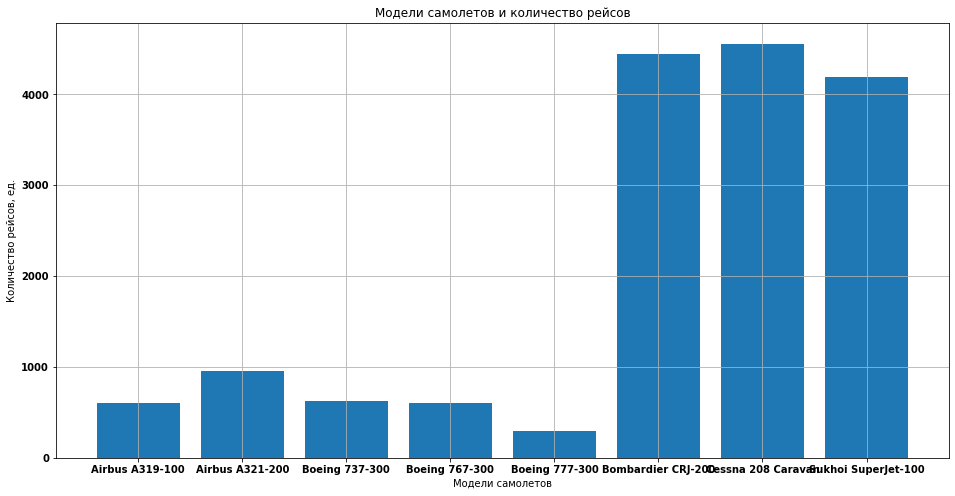

In [110]:
fig, ax = plt.subplots()
ax.bar( aircrafts['model'], aircrafts['flights_amount'])
ax.set_ylabel('Количество рейсов, ед.')
ax.set_xlabel('Модели самолетов')
ax.set_title('Модели самолетов и количество рейсов')
fig.set_size_inches(16, 8, forward=True)
ax.grid() 

По данному распределению можно четко увидеть, что самыми популярными моделями, причем с запасом, являются Sukhoi SuperJet-100(отечественный бренд, который навязывается российским авиакомпаниям), Bombardier CRJ-200(50-местная модель, популярна из за своих небольших размеров, следовательно, более экономична), Cessna 208 Caravan.

*Города и количество рейсов*

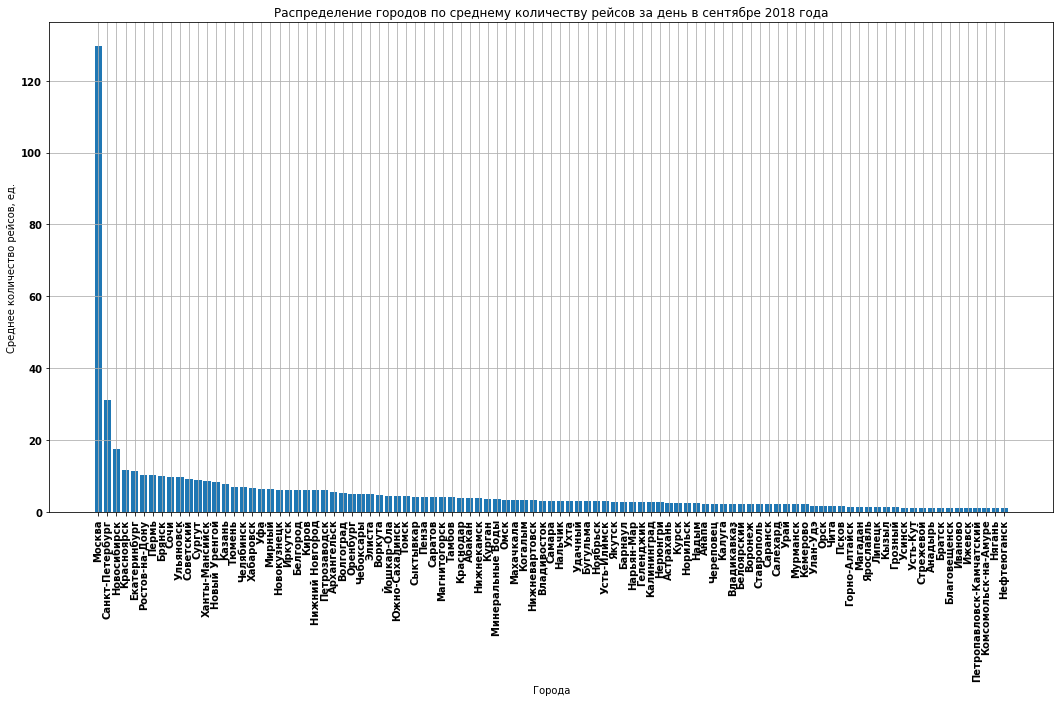

In [111]:
fig, ax = plt.subplots()
ax.bar(city.sort_values(by = 'average_flights', ascending = False)['city'], city.sort_values(by = 'average_flights', ascending = False)['average_flights'])
ax.set_ylabel('Среднее количество рейсов, ед.')
ax.set_xlabel('Города')
ax.set_title('Распределение городов по среднему количеству рейсов за день в сентябре 2018 года')
ax.tick_params(axis='x', which='major', rotation = 90)
fig.set_size_inches(18, 9, forward=True)
ax.grid()
#plt.tight_layout()

Москва является крупнейшим транспортным хабом России, поэтому ее колоссальное преимущество по сравнению с другими городами довольно логично. Также выделяются на фоне остальных Санкт-Петербург и Новосибирск. Они занимают в данном распределении 2 и 3 место. Также 2 и 3 место они занимают по количеству населения, этим и объясняется их крупные значения(Санкт-Петербург к тому же крупный туристический центр). Остальные же города линейно идут вниз. Зависимость вызвана населением региона, в котором расположен аэропорт.

*Топ-10 городов и количество рейсов*

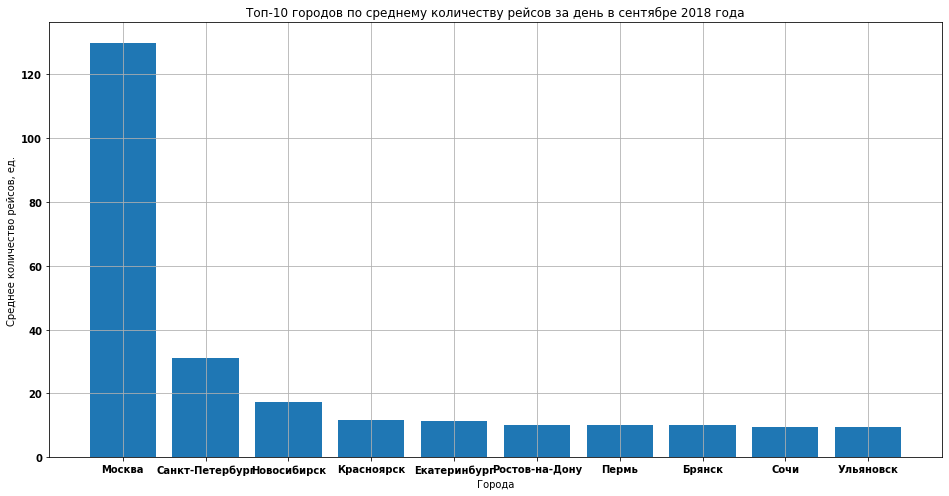

In [112]:
fig, ax = plt.subplots()
ax.bar( city.sort_values(by = 'average_flights', ascending = False).head(10)['city'], city.sort_values(by = 'average_flights', ascending = False).head(10)['average_flights'])
ax.set_ylabel('Среднее количество рейсов, ед.')
ax.set_xlabel('Города')
ax.set_title('Топ-10 городов по среднему количеству рейсов за день в сентябре 2018 года')
fig.set_size_inches(16, 8, forward=True)
ax.grid() 

7 из 10 представленных здесь городов - города-миллионники(все кроме Брянска, Сочи и Улияновска). Количество рейсов в Сочи объясняется тем, что Сочи - один крупнейших туристических городов России, куда люди едут как летом, так и зимой. В Ульяновске находится крупнейший авиационный институт России, это может вызывать дополнительное сосредоточение авиационных ресурсов в этом регионе. Брянск же является входным и выходным аэропортом России на юго-западных направлениях, поэтому на него приходится большая нагрузка. Нельзя сказать, что зависимость между количеством населения и количеством рейсов 100%, но этот фактор является одним из ключевых.